In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [21]:
# Axitinib Navitoclax Picolinici-acid Campthotecin BMS-754807 Afatinib Erlotinib Gefitinib
drug_name = 'Erlotinib' # 靶向药物 EGFR
# drug_name = 'Refametinib' # 靶向药物 MEK1/2抑制剂
# drug_name = 'AZD8055' # 靶向药物 mTOR
# target_pathway = ['EGFR tyrosine kinase inhibitor resistance','Non-small cell lung cancer','MAPK signaling pathway','PI3K signaling','Cell cycle','Apoptosis,'Small cell lung cancer']
target_pathway = ['MAPK signaling','PI3K signaling','ERK signaling','Apoptosis','TGFB signaling']
target_pathway_detail = ['KEGG_MEDICUS_REFERENCE_GF_RTK_RAS_PI3K_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_GF_RTK_RAS_ERK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_NFKB_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_JNK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RAS_ERK_SIGNALING_PATHWAY_ADAPTOR_PROTEINS','KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RAS_ERK_SIGNALING_UBIQUITINATION_OF_RTK_BY_CBL','KEGG_MEDICUS_REFERENCE_ERK_RSK_SIGNALING','KEGG_MEDICUS_REFERENCE_MLK_JNK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_PP2A_AKT_SIGNALING_PATHWA']

In [22]:
dict = {
    "<PAD>": 0,"<UNK>": 1,"<START>": 2,"<STOP>": 3,"(": 4,")": 5,"1": 6,"2": 7,"3": 8,"4": 9,"5": 10,"6": 11,"7": 12,"8": 13,"9": 14,"%10": 15,"%11": 16,"%12": 17,"%13": 18,"%14": 19,"%15": 20,"%16": 21,"%17": 22,"%18": 23,"%19": 24,"%20": 25,"%21": 26,"%22": 27,"%23": 28,"%24": 29,"%25": 30,"%26": 31,"%27": 32,"%28": 33,"%29": 34,"O": 35,"N": 36,"=": 37,"C": 38," ": 39,"Cl": 40,".": 41,"[Pt]": 42,"F": 43,"S": 44,"#": 45,"I": 46,"[Pt+2]": 47,"[NH-]": 48,"[O-]": 49,"[N+]": 50,"B": 51,"P": 52,"Br": 53,"[S+]": 54,"[Br-]": 55
}

In [23]:
df_smiles = pd.read_csv('../../data/CCLE-GDSC-SMILES.csv')
df_smiles.head()

,CID,SMILES,DRUG_NAME
0,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3=C2)O,Camptothecin
1,13342,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9C7C(C=CC9)(C(C(C8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O,Vinblastine
2,5702198,N.N.Cl[Pt]Cl,Cisplatin
3,6253,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,Cytarabine
4,148124,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)C(C(C5=CC=CC=C5)NC(=O)OC(C)(C)C)O)O)OC(=O)C6=CC=CC=C6)(CO4)OC(=O)C)O)C)O,Docetaxel


In [24]:
# 筛选出药物是Oxaliplatin
df_smiles_single_drug = df_smiles[df_smiles['DRUG_NAME'] == drug_name]
df_smiles_single_drug.head()

,CID,SMILES,DRUG_NAME
42,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC,Erlotinib


In [25]:
df_smiles_att = pd.read_csv('../../data/TransMCA_Smiles_Attention_MixedSet_GEP.csv')
df_smiles_att.head()

,drug,cell_line,OncotreeCode,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,AZD5582,22RV1,PRAD,0.001370,0.001521,0.001454,0.001706,0.001365,0.001494,0.001544,...,0.003941,0.003855,0.005668,0.003806,0.003874,0.005328,0.003379,0.006907,0.005089,0.003104
1,BMS-754807,22RV1,PRAD,0.001514,0.001662,0.001565,0.001833,0.001498,0.001634,0.001774,...,0.006810,0.005764,0.032638,0.025503,0.028222,0.008199,0.005181,0.005937,0.006428,0.005327
2,Cediranib,22RV1,PRAD,0.001486,0.001627,0.001532,0.001809,0.001452,0.001607,0.001705,...,0.004837,0.005213,0.006684,0.003508,0.025560,0.021572,0.018174,0.005961,0.006363,0.004061
3,Crizotinib,22RV1,PRAD,0.001484,0.001618,0.001533,0.001803,0.001450,0.001602,0.001718,...,0.004957,0.003650,0.013994,0.013716,0.016235,0.007871,0.005063,0.005906,0.006507,0.005265
4,Daporinad,22RV1,PRAD,0.001659,0.001881,0.001699,0.001988,0.001715,0.001802,0.001929,...,0.005951,0.006124,0.007619,0.005106,0.006653,0.008402,0.009624,0.014723,0.007268,0.005047


In [26]:
# 筛选出药物是Oxaliplatin
df_smiles_att_single_drug = df_smiles_att[df_smiles_att['drug'] == drug_name]
# LUAD:['NCIH2228','HCC827','EKVX','PC14']
# SCLC:['NCIH526','LU135','NCIH146','NCIH1963']
cell_line = ['NCIH2228','HCC827','EKVX','PC14'] # LUAD 发生EGFR突变：HCC827，PC14
# cell_line = ['EKVX','NCIH2228']
# cell_line = ['NCIH526','LU135','NCIH146','NCIH1963']
# cell_line = ['YH13','42MGBA','CAS1','8MGBA']
df_smiles_att_single_drug = df_smiles_att_single_drug[df_smiles_att_single_drug['cell_line'].isin(cell_line)]
print(df_smiles_att_single_drug.shape)
df_smiles_att_single_drug.head()

(4, 259)


,drug,cell_line,OncotreeCode,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
2508,Erlotinib,EKVX,LUAD,0.001506,0.001654,0.001537,0.001826,0.001466,0.001622,0.002459,...,0.004063,0.004665,0.006650,0.005505,0.005209,0.009482,0.004976,0.006335,0.005913,0.004238
3437,Erlotinib,HCC827,LUAD,0.001510,0.001656,0.001541,0.001826,0.001471,0.001635,0.002396,...,0.006543,0.009678,0.026026,0.021330,0.022416,0.008520,0.005655,0.005633,0.006658,0.005065
7808,Erlotinib,NCIH2228,LUAD,0.001503,0.001640,0.001530,0.001826,0.001465,0.001628,0.002413,...,0.015218,0.015256,0.026787,0.006506,0.006065,0.006813,0.004661,0.006357,0.006537,0.004791
9317,Erlotinib,PC14,LUAD,0.001509,0.001654,0.001545,0.001832,0.001471,0.001625,0.002529,...,0.004068,0.004697,0.006590,0.005482,0.005237,0.009441,0.004974,0.006310,0.005922,0.004257


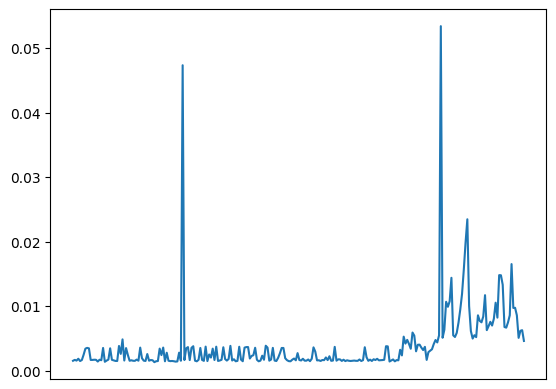

In [27]:
# 将df_smiles_att_oxaliplatin从第四列开始的数据取均值
df_smiles_att_single_drug_mean = df_smiles_att_single_drug.iloc[:, 3:].mean(axis=0)
# 将df_smiles_att_oxaliplatin_mean画成折线图
plt.plot(df_smiles_att_single_drug_mean)
# 不显示X轴的信息
plt.xticks([])
plt.show()

In [28]:
from pytoda.smiles import SMILESTokenizer
smiles_language_filepath = '../../../data/smiles_language/tokenizer_customized'
# Load SMILES language
smiles_language = SMILESTokenizer.from_pretrained(smiles_language_filepath)
smiles_language.set_encoding_transforms(
    add_start_and_stop=True,
    padding=True,
    padding_length=256,
    # padding_length=params.get("smiles_padding_length", None),
)
smiles_language.set_smiles_transforms(
    augment=False,
    canonical=False,
    kekulize=False,
    all_bonds_explicit=False,
    all_hs_explicit=False,
    remove_bonddir=False,
    remove_chirality=False,
    selfies=False,
    sanitize=False,
)
smiles_language.add_dataset(df_smiles['SMILES'])

In [29]:
single_drug = smiles_language.smiles_to_token_indexes(df_smiles[df_smiles['DRUG_NAME'] == drug_name]['SMILES'].values[0])
single_drug_num_array = np.array(single_drug)
type(single_drug_num_array)

numpy.ndarray

In [30]:
# 根据dict将Oxaliplatin从数字替换成字符
single_drug_strs = [list(dict.keys())[list(dict.values()).index(i)] for i in single_drug]
# 将Oxaliplatin转换成ndarray
single_drug_strs = np.array(single_drug_strs)
type(single_drug_strs)

numpy.ndarray

In [31]:
plot_cell_line1 = 'PC14'
plot_cell_line2 = 'HCC827'

In [32]:
# 取df_smiles_att_single_drug第一行
df_smiles_att_single_cell1 = df_smiles_att_single_drug[df_smiles_att_single_drug['cell_line'] == plot_cell_line1]
df_smiles_att_single_cell2 = df_smiles_att_single_drug[df_smiles_att_single_drug['cell_line'] == plot_cell_line2]

In [33]:
smile1 = df_smiles_att_single_cell1.iloc[:,3:].to_numpy()
smile2 = df_smiles_att_single_cell2.iloc[:,3:].to_numpy()
type(smile1),type(smile2)

(numpy.ndarray, numpy.ndarray)

In [34]:
single_drug_observe = np.vstack([single_drug_num_array, single_drug_strs, smile1,smile2])
single_drug_observe

array([['0', '0', '0', ..., '35', '38', '3'],
       ['<PAD>', '<PAD>', '<PAD>', ..., 'O', 'C', '<STOP>'],
       ['0.001508529', '0.001653518', '0.001544962', ..., '0.006310102',
        '0.005922098', '0.004256647'],
       ['0.001510165', '0.001655696', '0.00154102', ..., '0.005632503',
        '0.006657552', '0.005064732']], dtype='<U32')

In [35]:
start = 203
end = 255
# 取single_drug_observe224-255的数据
single_drug_observe_smiles = single_drug_observe[:, start:end]
# dataframe
# single_drug_observe_224_255 = pd.DataFrame(single_drug_observe_224_255)
single_drug_observe_smiles

array([['38', '35', '38', '38', '35', '38', '6', '37', '38', '4', '38',
        '37', '38', '7', '38', '4', '37', '38', '6', '5', '38', '4',
        '37', '36', '38', '37', '36', '7', '5', '36', '38', '8', '37',
        '38', '38', '37', '38', '38', '4', '37', '38', '8', '5', '38',
        '45', '38', '5', '35', '38', '38', '35', '38'],
       ['C', 'O', 'C', 'C', 'O', 'C', '1', '=', 'C', '(', 'C', '=', 'C',
        '2', 'C', '(', '=', 'C', '1', ')', 'C', '(', '=', 'N', 'C', '=',
        'N', '2', ')', 'N', 'C', '3', '=', 'C', 'C', '=', 'C', 'C', '(',
        '=', 'C', '3', ')', 'C', '#', 'C', ')', 'O', 'C', 'C', 'O', 'C'],
       ['0.003583779', '0.004126188', '0.004817098', '0.003870389',
        '0.004736577', '0.054329842', '0.00549863', '0.00731571',
        '0.014962277', '0.014049462', '0.015433264', '0.023164764',
        '0.006192931', '0.005234589', '0.006625508', '0.006768137',
        '0.010193159', '0.015016866', '0.013125713', '0.018252796',
        '0.026901573', '0.0063

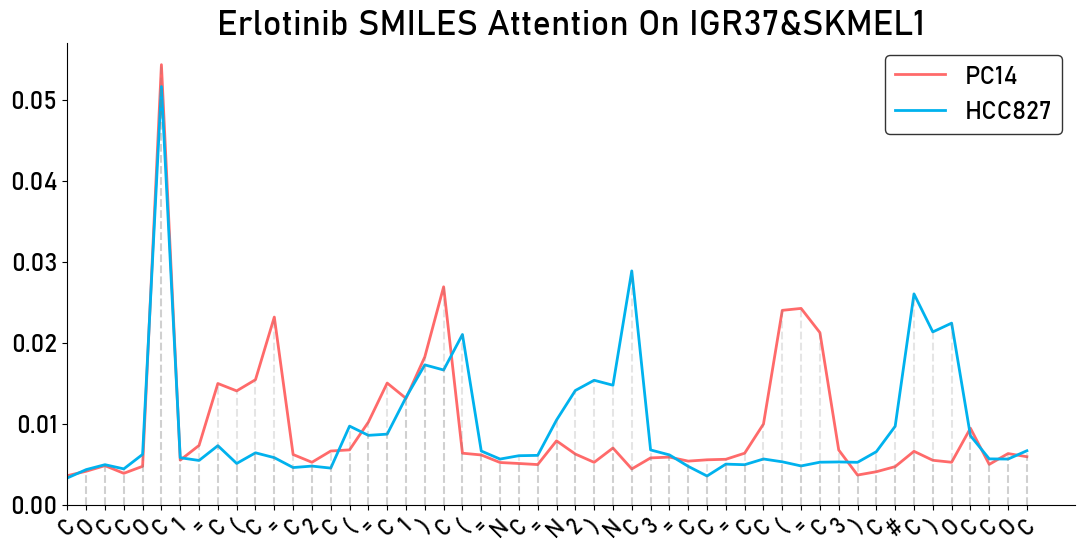

In [36]:
# 取single_drug_observe_smiles的第二行;
Erlotinib_smiles = single_drug_observe_smiles[1, :]
HCC827_att = single_drug_observe_smiles[2, :].astype(float)
PC14_att = single_drug_observe_smiles[3, :].astype(float)
palette = {
    'Ground Truth': '#00B2EE',
    'Prediction': '#FF6A6A'
}

plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(13, 6))
# plt.plot(PC14_att, label='PC14',linewidth=3, color='#FF6A6A')
plt.plot(HCC827_att, label=plot_cell_line1,linewidth=2, color='#FF6A6A')
plt.plot(PC14_att, label=plot_cell_line2,linewidth=2, color='#00B2EE')
# 每个点与X轴加上虚线
for i in range(len(HCC827_att)):
    plt.vlines(i, 0, HCC827_att[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(PC14_att)):
    plt.vlines(i, 0, PC14_att[i], linestyles='dashed', colors='grey', alpha=0.2)
# 显示label
plt.legend(fontsize=18,edgecolor='black',loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On IGR37&SKMEL1', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

# plt.savefig(drug_name + '_SMILES_Attention_Observation_IGR37&SKMEL1', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
# 读取drug_sensitivity数据
df_drug_sensitivity = pd.read_csv('../../data/drug_sensitivity_MixedSet_Erlotinib_test&prediction.csv')[['drug','cell_line','IC50','prediction']]
# drug_name = ['Erlotinib','Gefitinib','Afatinib','Osimertinib']
# 筛选出cell_line = ['NCIH2228','HCC827','EKVX','PC14']，drug = Gefitinib的数据
df_drug_sensitivity_single_drug = df_drug_sensitivity[(df_drug_sensitivity['cell_line'].isin(cell_line)) & (df_drug_sensitivity['drug'] == drug_name)] #  & (df_drug_sensitivity['drug'] == drug_name)
df_drug_sensitivity_single_drug.columns = ['drug','cell_line','Ground Truth','Prediction']
print(df_drug_sensitivity_single_drug.shape)
df_drug_sensitivity_single_drug.head()

(4, 4)


,drug,cell_line,Ground Truth,Prediction
4337,Refametinib,IGR37,-2.702946,-1.594619
10457,Refametinib,SKMEL1,-0.827395,-0.524364
10473,Refametinib,SKMEL2,0.175932,0.327843
10494,Refametinib,SKMEL24,0.555087,0.461186


In [42]:
# 将df_mix_set_drugs melt操作，将IC50和prediction列合并成一列，列名为value，将IC50和prediction列的列名合并成一列，列名为variable
# Melt the DataFrame with a different value_name
df_mix_set_drugs = df_drug_sensitivity_single_drug.melt(id_vars=['cell_line', 'drug'], value_vars=['Ground Truth', 'Prediction'], var_name='variable', value_name='result')
# 根据cell_line和drug排序
df_mix_set_drugs = df_mix_set_drugs.sort_values(by=['drug'])
print(df_mix_set_drugs.shape)
df_mix_set_drugs.head(32)

(8, 4)


,cell_line,drug,variable,result
0,IGR37,Refametinib,Ground Truth,-2.702946
1,SKMEL1,Refametinib,Ground Truth,-0.827395
2,SKMEL2,Refametinib,Ground Truth,0.175932
3,SKMEL24,Refametinib,Ground Truth,0.555087
4,IGR37,Refametinib,Prediction,-1.594619
5,SKMEL1,Refametinib,Prediction,-0.524364
6,SKMEL2,Refametinib,Prediction,0.327843
7,SKMEL24,Refametinib,Prediction,0.461186


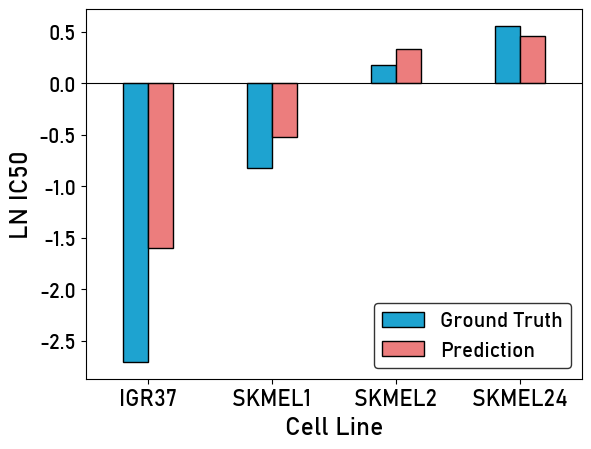

In [93]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
df_mix_set_drugs.head(32)
palette = {
    'Ground Truth': '#00B2EE',
    'Prediction': '#FF6A6A'
}
# plt.figure(figsize=(6, 6))
# 画柱状图
sns.barplot(x='cell_line', y='result', hue='variable', data=df_mix_set_drugs, palette=palette,edgecolor='black',width=0.4)
# 设计legend样式
plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线
plt.axhline(0, color='black', linewidth=0.8)
# title
# plt.title('Erlotinib IC50&Prediction On HCC827&PC14 (MixedSet)', fontsize=20)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=15)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('LN IC50', fontsize=18)
# 保存图片
plt.savefig('MEK_Drugs_IC50&Prediction_On_MEL_MixedSet.png', dpi=300, bbox_inches='tight')
plt.show()

# 对比试验

In [34]:
df_Erlotinib_MixedSet_CellBlind = pd.read_csv('Erlotinib_MixedSet&CellBlind.csv',index_col=0,header=None, dtype=str)
# 去掉第一行
# df_Erlotinib_MixedSet_CellBlind = df_Erlotinib_MixedSet_CellBlind.drop(index=0)
df_Erlotinib_MixedSet_CellBlind.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,,,,,,,,,,,,,,,,,,,,,
0,38,35,38,38,35,38,6,37,38,4,...,5,38,45,38,5,35,38,38,35,38
1,C,O,C,C,O,C,1,=,C,(,...,),C,#,C,),O,C,C,O,C
2,0.003441373,0.004227954,0.004877217,0.004145255,0.005473035,0.05297914,0.005646021,0.006387842,0.011124036,0.009569885,...,0.004443945,0.005305588,0.007187839,0.016307912,0.013405883,0.013826711,0.008980575,0.005314586,0.005971302,0.006289825
3,0.006564795,0.002853644,0.005970444,0.005283537,0.00829527,0.007969339,0.005271394,0.009390259,0.011105644,0.013289003,...,0.012916459,0.006880187,0.009706578,0.007694119,0.005821197,0.005852738,0.011792211,0.007875927,0.005921335,0.004140577


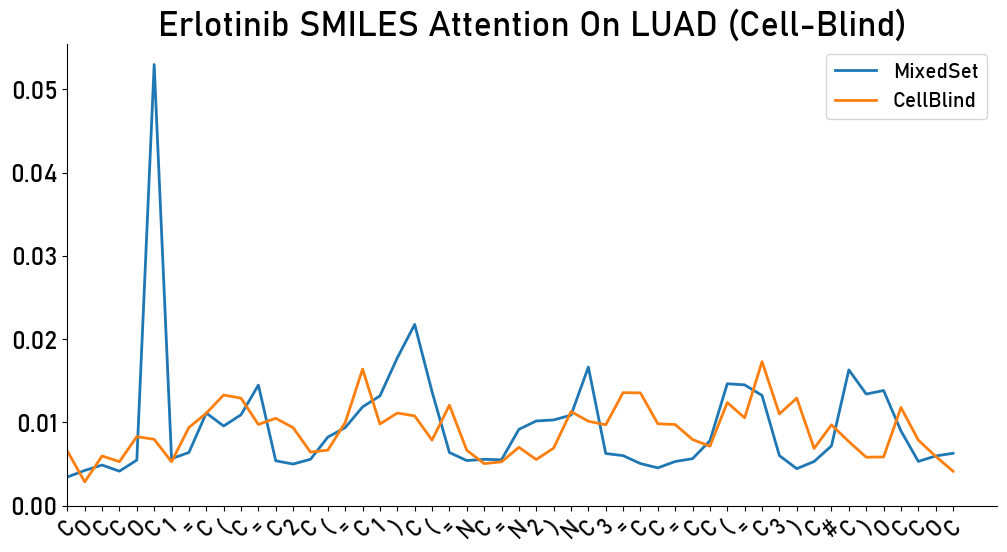

In [35]:
# 取df_Erlotinib_MixedSet_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_MixedSet_CellBlind.iloc[1, :].values
mixed_att = df_Erlotinib_MixedSet_CellBlind.iloc[2, :].values.astype(float)
cellblind_att = df_Erlotinib_MixedSet_CellBlind.iloc[3, :].values.astype(float)
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
plt.plot(mixed_att, label='MixedSet',linewidth=2)
plt.plot(cellblind_att, label='CellBlind',linewidth=2)
# 显示label
plt.legend(fontsize=15)
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On LUAD (Cell-Blind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

# plt.savefig(drug_name + '_SMILES_Attention_Observation_Mixed&CellBlind.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
# HCC827 PC14
df_Erlotinib_HCC827_PC14 = pd.read_csv('Erlotinib_HCC827&PC14.csv',index_col=0,header=None, dtype=str)
# 去掉第一行
# df_Erlotinib_MixedSet_CellBlind = df_Erlotinib_MixedSet_CellBlind.drop(index=0)
df_Erlotinib_HCC827_PC14.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,,,,,,,,,,,,,,,,,,,,,
0,38,35,38,38,35,38,6,37,38,4,...,5,38,45,38,5,35,38,38,35,38
1,C,O,C,C,O,C,1,=,C,(,...,),C,#,C,),O,C,C,O,C
2,0.003299,0.00433,0.004937,0.00442,0.006209,0.051628,0.005793,0.00546,0.007286,0.00509,...,0.00523,0.006543,0.009678,0.026026,0.02133,0.022416,0.00852,0.005655,0.005633,0.006658
3,0.003584,0.004126,0.004817,0.00387,0.004737,0.05433,0.005499,0.007316,0.014962,0.014049,...,0.003658,0.004068,0.004697,0.00659,0.005482,0.005237,0.009441,0.004974,0.00631,0.005922


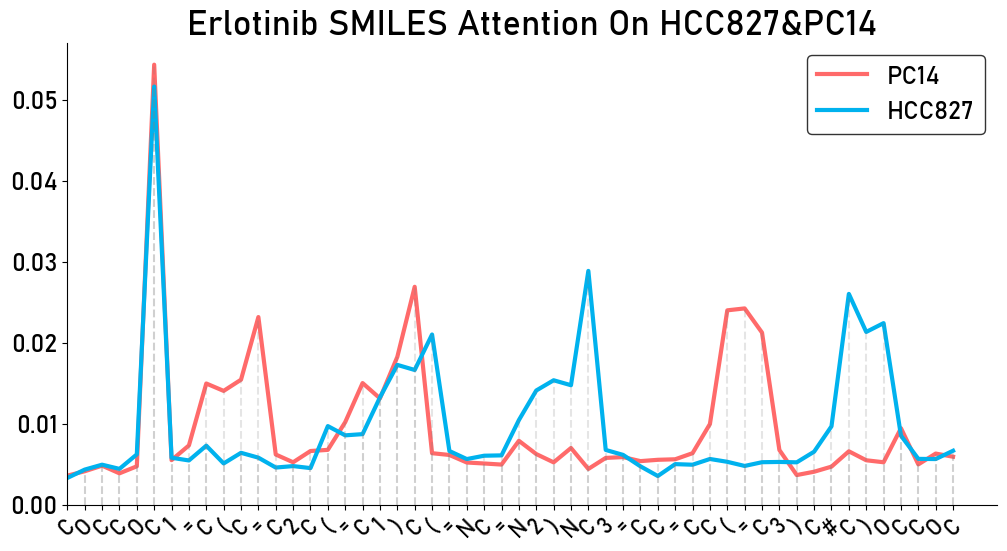

In [55]:
# 取df_Erlotinib_MixedSet_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_HCC827_PC14.iloc[1, :].values
HCC827_att = df_Erlotinib_HCC827_PC14.iloc[2, :].values.astype(float)
PC14_att = df_Erlotinib_HCC827_PC14.iloc[3, :].values.astype(float)
palette = {
    'Ground Truth': '#00B2EE',
    'Prediction': '#FF6A6A'
}
# x = np.arange(len(Erlotinib_smiles))
# # 创建插值函数
# spl_HCC827 = make_interp_spline(x, HCC827_att)
# spl_PC14 = make_interp_spline(x, PC14_att)
# 
# # 创建更密集的x值
# xnew = np.linspace(x.min(), x.max(), 500)
# 
# # 使用插值函数计算新的y值
# HCC827_att_smooth = spl_HCC827(xnew)
# PC14_att_smooth = spl_PC14(xnew)

plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
plt.plot(PC14_att, label='PC14',linewidth=3, color='#FF6A6A')
plt.plot(HCC827_att, label='HCC827',linewidth=3, color='#00B2EE')
# 每个点与X轴加上虚线
for i in range(len(HCC827_att)):
    plt.vlines(i, 0, HCC827_att[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(PC14_att)):
    plt.vlines(i, 0, PC14_att[i], linestyles='dashed', colors='grey', alpha=0.2)
# 显示label
plt.legend(fontsize=18,edgecolor='black',loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On HCC827&PC14', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

plt.savefig(drug_name + '_SMILES_Attention_Observation_HCC827&PC14.png', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
# HCC827
df_Erlotinib_HCC827_Mixed_CellBlind = pd.read_csv('Erlotinib_MixedSet&CellBlind.csv',index_col=0,header=None, dtype=str)
# 去掉第一行
# df_Erlotinib_MixedSet_CellBlind = df_Erlotinib_MixedSet_CellBlind.drop(index=0)
df_Erlotinib_HCC827_Mixed_CellBlind.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,,,,,,,,,,,,,,,,,,,,,
0,38,35,38,38,35,38,6,37,38,4,...,5,38,45,38,5,35,38,38,35,38
1,C,O,C,C,O,C,1,=,C,(,...,),C,#,C,),O,C,C,O,C
2,0.003441373,0.004227954,0.004877217,0.004145255,0.005473035,0.05297914,0.005646021,0.006387842,0.011124036,0.009569885,...,0.004443945,0.005305588,0.007187839,0.016307912,0.013405883,0.013826711,0.008980575,0.005314586,0.005971302,0.006289825
3,0.006564795,0.002853644,0.005970444,0.005283537,0.00829527,0.007969339,0.005271394,0.009390259,0.011105644,0.013289003,...,0.012916459,0.006880187,0.009706578,0.007694119,0.005821197,0.005852738,0.011792211,0.007875927,0.005921335,0.004140577


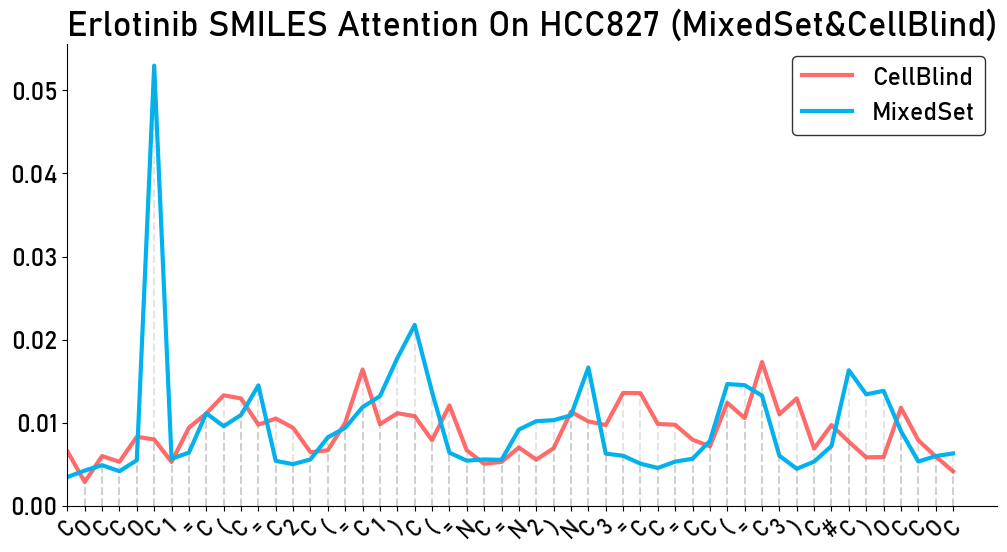

In [56]:
# 取df_Erlotinib_HCC827_Mixed_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_HCC827_Mixed_CellBlind.iloc[1, :].values
HCC827_Mixed = df_Erlotinib_HCC827_Mixed_CellBlind.iloc[2, :].values.astype(float)
HCC827_CellBlind = df_Erlotinib_HCC827_Mixed_CellBlind.iloc[3, :].values.astype(float)
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
plt.plot(HCC827_CellBlind, label='CellBlind',linewidth=3, color='#FF6A6A')
plt.plot(HCC827_Mixed, label='MixedSet',linewidth=3, color='#00B2EE')
# 每个点与X轴加上虚线
for i in range(len(HCC827_CellBlind)):
    plt.vlines(i, 0, HCC827_CellBlind[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(HCC827_Mixed)):
    plt.vlines(i, 0, HCC827_Mixed[i], linestyles='dashed', colors='grey', alpha=0.2)
# 显示label
plt.legend(fontsize=18,edgecolor='black',loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On HCC827 (MixedSet&CellBlind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

plt.savefig(drug_name + '_SMILES_Attention_Observation_HCC827_Mixed&CellBlind.png', dpi=300, bbox_inches='tight')
plt.show()


In [52]:
# PC14
df_Erlotinib_PC14_Mixed_CellBlind = pd.read_csv('Erlotinib_PC14_MixedSet&CellBlind.csv',index_col=0,header=None, dtype=str)
# 去掉第一行
# df_Erlotinib_MixedSet_CellBlind = df_Erlotinib_MixedSet_CellBlind.drop(index=0)
df_Erlotinib_PC14_Mixed_CellBlind.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,,,,,,,,,,,,,,,,,,,,,
0,38,35,38,38,35,38,6,37,38,4,...,5,38,45,38,5,35,38,38,35,38
1,C,O,C,C,O,C,1,=,C,(,...,),C,#,C,),O,C,C,O,C
2,0.003583779,0.004126188,0.004817098,0.003870389,0.004736577,0.054329842,0.00549863,0.00731571,0.014962277,0.014049462,...,0.003657557,0.004067709,0.004697397,0.006590021,0.005481569,0.005237354,0.009440726,0.004974457,0.006310102,0.005922098
3,0.006468267,0.002861602,0.005021571,0.005931099,0.010602857,0.006637208,0.005194581,0.013820236,0.014784254,0.016362643,...,0.008836783,0.005946063,0.004664169,0.007042124,0.007274111,0.007042444,0.015221387,0.007776811,0.006665342,0.003808043


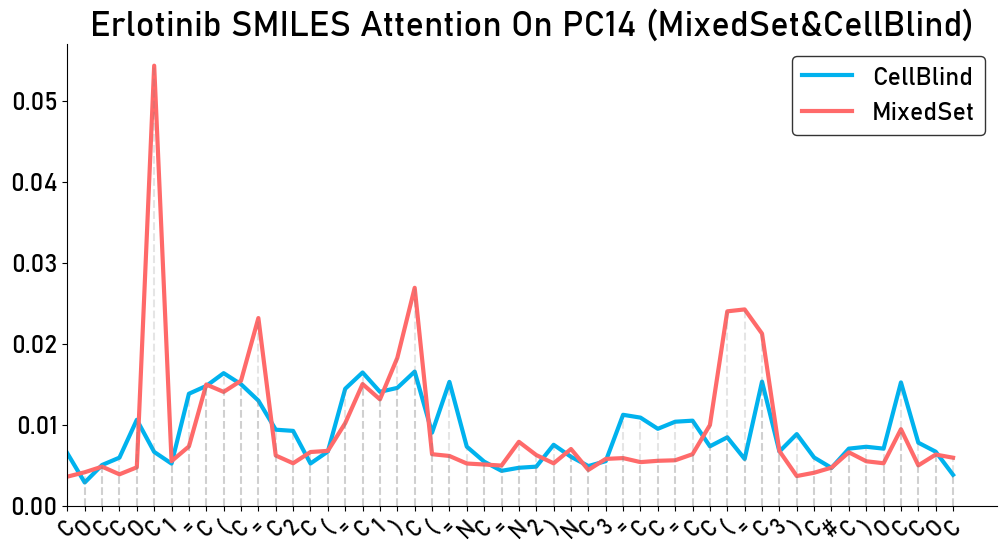

In [54]:
# 取df_Erlotinib_PC14_Mixed_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_PC14_Mixed_CellBlind.iloc[1, :].values
PC14_Mixed = df_Erlotinib_PC14_Mixed_CellBlind.iloc[2, :].values.astype(float)
PC14_CellBlind = df_Erlotinib_PC14_Mixed_CellBlind.iloc[3, :].values.astype(float)
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
plt.plot(PC14_CellBlind, label='CellBlind',linewidth=3, color='#00B2EE')
plt.plot(PC14_Mixed, label='MixedSet',linewidth=3, color='#FF6A6A')
# 每个点与X轴加上虚线
for i in range(len(PC14_CellBlind)):
    plt.vlines(i, 0, PC14_CellBlind[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(PC14_Mixed)):
    plt.vlines(i, 0, PC14_Mixed[i], linestyles='dashed', colors='grey', alpha=0.2)
# 显示label
plt.legend(fontsize=18,edgecolor='black',loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On PC14 (MixedSet&CellBlind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

plt.savefig(drug_name + '_SMILES_Attention_Observation_PC-14_Mixed&CellBlind.png', dpi=300, bbox_inches='tight')
plt.show()

# LUAD中发生EGFR突变的药效分析

In [34]:
df_cell_blind_drugs = pd.read_csv('CellBlind_EGFR_drugs_IC50&Prediction.csv')
# 去掉OncotreeCode列
df_cell_blind_drugs = df_cell_blind_drugs.drop(columns='OncotreeCode')
# 将IC50列改成Ground Truth，prediction列改成Prediction
df_cell_blind_drugs.columns = ['drug','cell_line','Ground Truth','Prediction']
print(df_cell_blind_drugs.shape)
df_cell_blind_drugs.head(20)

(16, 4)


,drug,cell_line,Ground Truth,Prediction
0,Afatinib,HCC827,-3.935928,0.854371
1,Erlotinib,HCC827,-2.707414,3.097792
2,Gefitinib,HCC827,-2.738697,3.107241
3,Osimertinib,HCC827,-3.593735,1.613732
4,Afatinib,PC14,-3.530785,1.417494
5,Erlotinib,PC14,-2.165833,2.967352
6,Gefitinib,PC14,-1.397133,3.490118
7,Osimertinib,PC14,-3.304462,1.406334
8,Afatinib,NCIH2228,2.361375,0.878386
9,Erlotinib,NCIH2228,3.922373,3.343516


In [35]:
# 根据cell_line分组，求出每个cell_line的IC50列,prediction列的均值
df_cell_blind_drugs_mean = df_cell_blind_drugs[['cell_line','Ground Truth','Prediction']].groupby('cell_line').mean()
# cell_line按照[HCC827,PC14,NCIH2228,EKVX]排序
df_cell_blind_drugs_mean = df_cell_blind_drugs_mean.reindex(['HCC827','PC14','NCIH2228','EKVX'])
# 将IC50列改成Ground Truth，prediction列改成Prediction
df_cell_blind_drugs_mean.columns = ['Ground Truth','Prediction']
print(df_cell_blind_drugs_mean.shape)
df_cell_blind_drugs_mean.head(20)

(4, 2)


,Ground Truth,Prediction
cell_line,,
HCC827,-3.243944,2.168284
PC14,-2.599553,2.320324
NCIH2228,3.345796,2.252594
EKVX,1.499043,0.179884


In [36]:
df_mix_set_drugs = pd.read_csv('Mixed_EGFR_drugs_IC50&Prediction.csv')
# 去掉OncotreeCode列
df_mix_set_drugs = df_mix_set_drugs.drop(columns='OncotreeCode')
# 将IC50列改成Ground Truth，prediction列改成Prediction
df_mix_set_drugs.columns = ['drug','cell_line','Ground Truth','Prediction']

print(df_mix_set_drugs.shape)
df_mix_set_drugs.head(20)

(4, 4)


,drug,cell_line,Ground Truth,Prediction
0,Erlotinib,HCC827,-2.707414,-0.576975
1,Erlotinib,PC14,-2.165833,-1.300865
2,Erlotinib,NCIH2228,3.922373,3.404778
3,Erlotinib,EKVX,1.720419,2.329803


In [37]:
df_mix_set_drugs_mean = df_mix_set_drugs[['cell_line','Ground Truth','Prediction']].groupby('cell_line').mean()
df_mix_set_drugs_mean = df_mix_set_drugs_mean.reindex(['HCC827','PC14'])
df_mix_set_drugs_mean.columns = ['Ground Truth','Prediction']
print(df_mix_set_drugs_mean.shape)
df_mix_set_drugs_mean.head(20)

(2, 2)


,Ground Truth,Prediction
cell_line,,
HCC827,-2.707414,-0.576975
PC14,-2.165833,-1.300865


In [38]:
# 将df_cell_blind_drugs数据形式更改，将IC50和prediction列合并成一列，列名为value，将IC50和prediction列的列名合并成一列，列名为variable
# Melt the DataFrame with a different value_name
df_cell_blind_drugs = df_cell_blind_drugs.melt(id_vars=['cell_line', 'drug'], value_vars=['Ground Truth', 'Prediction'], var_name='variable', value_name='result')
# 根据cell_line和drug排序
df_cell_blind_drugs = df_cell_blind_drugs.sort_values(by=['drug'])
print(df_cell_blind_drugs.shape)
df_cell_blind_drugs.head(32)

(32, 4)


,cell_line,drug,variable,result
0,HCC827,Afatinib,Ground Truth,-3.935928
20,PC14,Afatinib,Prediction,1.417494
16,HCC827,Afatinib,Prediction,0.854371
8,NCIH2228,Afatinib,Ground Truth,2.361375
28,EKVX,Afatinib,Prediction,-0.608043
12,EKVX,Afatinib,Ground Truth,0.370903
24,NCIH2228,Afatinib,Prediction,0.878386
4,PC14,Afatinib,Ground Truth,-3.530785
29,EKVX,Erlotinib,Prediction,0.636531
9,NCIH2228,Erlotinib,Ground Truth,3.922373


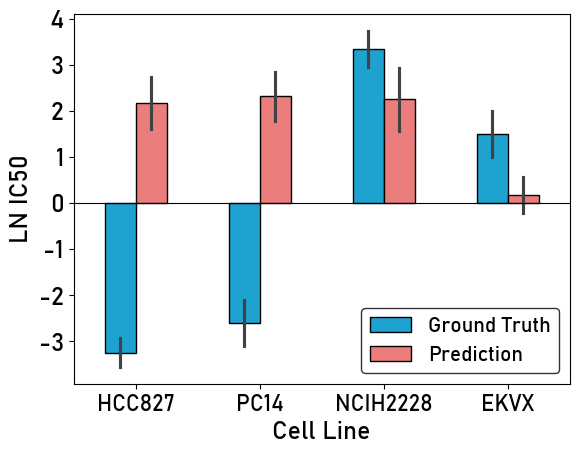

In [146]:
# 画柱状图，要求：以cell_line为X轴，画出每个cell_line的每个drug对应的result，分成两个柱子，一个柱子是正常的，一个柱子是带条纹的，带条纹的是prediction，正常的是IC50；并且不同的drug颜色不同，颜色分成两种，
# 设置画布大小
palette = {
    'Ground Truth': '#00B2EE',
    'Prediction': '#FF6A6A'
}
# plt.figure(figsize=(12, 6))
# 画柱状图
sns.barplot(x='cell_line', y='result', hue='variable', data=df_cell_blind_drugs, palette=palette,edgecolor='black',width=0.5,errorbar='se')
# 设计legend样式
plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线
plt.axhline(0, color='black', linewidth=0.8)
# title
# plt.title('EGFR Drugs IC50&Prediction On LUAD (Cell-Blind)', fontsize=25)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('LN IC50', fontsize=18)
# 保存图片
plt.savefig('img/EGFR_Drugs_IC50&Prediction_On_LUAD_Cell_Blind.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
# 将df_mix_set_drugs melt操作，将IC50和prediction列合并成一列，列名为value，将IC50和prediction列的列名合并成一列，列名为variable
# Melt the DataFrame with a different value_name
df_mix_set_drugs = df_mix_set_drugs.melt(id_vars=['cell_line', 'drug'], value_vars=['Ground Truth', 'Prediction'], var_name='variable', value_name='result')
# 根据cell_line和drug排序
df_mix_set_drugs = df_mix_set_drugs.sort_values(by=['drug'])
print(df_mix_set_drugs.shape)
df_mix_set_drugs.head(32)

(8, 4)


,cell_line,drug,variable,result
0,HCC827,Erlotinib,Ground Truth,-2.707414
1,PC14,Erlotinib,Ground Truth,-2.165833
2,NCIH2228,Erlotinib,Ground Truth,3.922373
3,EKVX,Erlotinib,Ground Truth,1.720419
4,HCC827,Erlotinib,Prediction,-0.576975
5,PC14,Erlotinib,Prediction,-1.300865
6,NCIH2228,Erlotinib,Prediction,3.404778
7,EKVX,Erlotinib,Prediction,2.329803


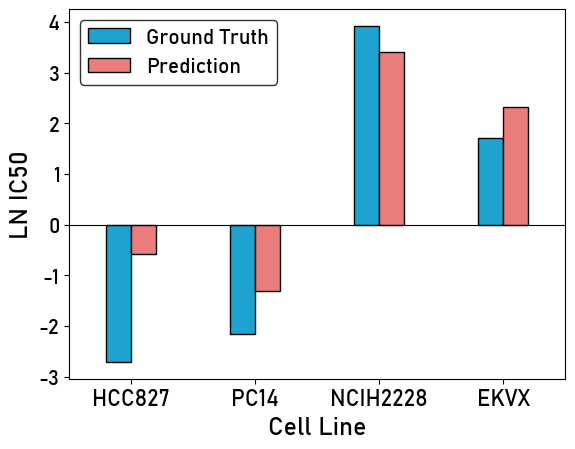

In [41]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# df_mix_set_drugs_mean画柱状图，每个cell_line的result列的值，按照variable分成两个柱子，使用seaborn画图
# 设置画布大小
# plt.figure(figsize=(6, 6))
# 画柱状图
sns.barplot(x='cell_line', y='result', hue='variable', data=df_mix_set_drugs, palette=palette,edgecolor='black',width=0.4)
# 设计legend样式
plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线
plt.axhline(0, color='black', linewidth=0.8)
# title
# plt.title('Erlotinib IC50&Prediction On HCC827&PC14 (MixedSet)', fontsize=20)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=15)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('LN IC50', fontsize=18)
# 保存图片
plt.savefig('img/EGFR_Drugs_IC50&Prediction_On_LUAD_MixedSet.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x600 with 0 Axes>

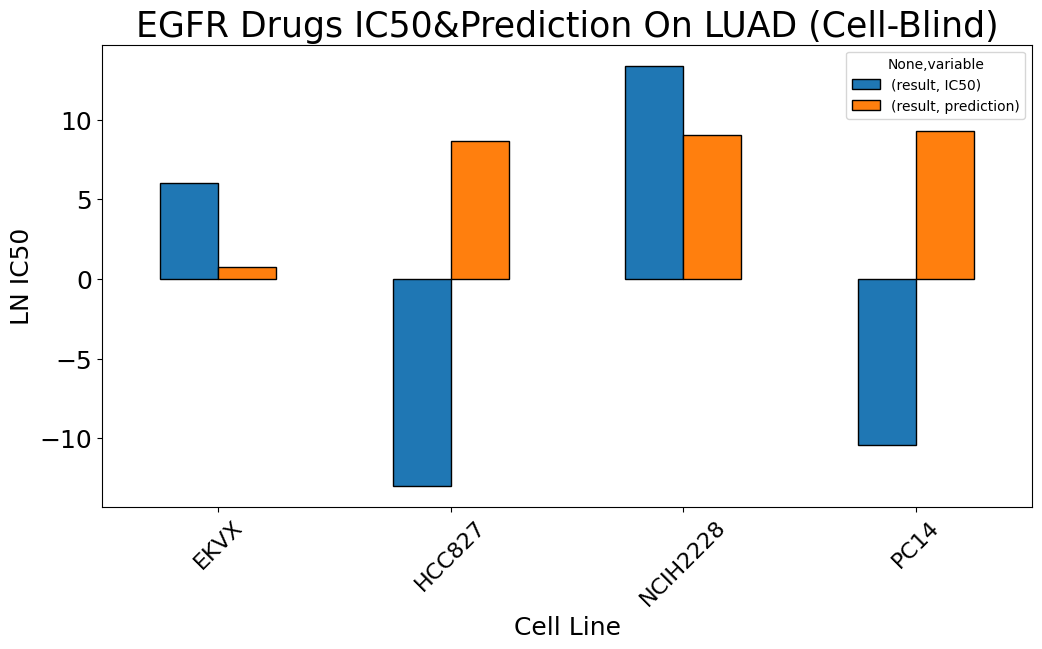

In [62]:
# 用plot画柱状图，要求：以cell_line为X轴，画出每个cell_line的每个drug对应的result，按照variable分成两个柱子
# 设置画布大小
plt.figure(figsize=(12, 6))
# 画柱状图
df_cell_blind_drugs.groupby(['cell_line', 'variable']).sum().unstack().plot(kind='bar', figsize=(12, 6), width=0.5, edgecolor='black')
# title
plt.title('EGFR Drugs IC50&Prediction On LUAD (Cell-Blind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('LN IC50', fontsize=18)
# 保存图片
# plt.savefig('EGFR_Drugs_IC50&Prediction_On_LUAD_Cell_Blind.png', dpi=300, bbox_inches='tight')
plt.show()

In [67]:
# 根据cell_line分组，求出每个cell_line的IC50列,prediction列的误差RMSE
df_cell_blind_drugs_rmse = df_cell_blind_drugs[['cell_line','IC50','prediction']].groupby('cell_line').apply(lambda x: np.sqrt(np.mean((x['IC50'] - x['prediction'])**2)), include_groups=False)
# cell_line按照[HCC827,PC14,NCIH2228,EKVX]排序
df_cell_blind_drugs_rmse = df_cell_blind_drugs_rmse.reindex(['HCC827','PC14','NCIH2228','EKVX'])
# 将IC50列改成Ground Truth，prediction列改成Prediction
df_cell_blind_drugs_rmse.columns = ['RMSE']
print(df_cell_blind_drugs_rmse.shape)
df_cell_blind_drugs_rmse.head(20)

(4,)


cell_line
HCC827      5.430011
PC14        4.922191
NCIH2228    1.221095
EKVX        1.352632
dtype: float64

In [ ]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# df_cell_blind_drugs_rmse画柱状图，每个cell_line的IC50列,prediction列的均值
df_cell_blind_drugs_rmse.plot(kind='bar', figsize=(6, 6), width=0.5, edgecolor='black')
# 加入Y=0的线
plt.axhline(0, color='black', linewidth=0.8)
plt.title('EGFR Drugs RMSE On LUAD (Cell-Blind)', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
# plt.savefig('EGFR_Drugs_RMSE_On_LUAD_Cell_Blind.png', dpi=300, bbox_inches='tight')
plt.show()

# 靶向药与非靶向药 皮尔逊相关系数对比

In [58]:
# 读取drug_sensitivity数据
df_drug_sensitivity = pd.read_csv('../../data/drug_sensitivity_lung_CellBlind_test&prediction.csv')
drug_name_EGFR = ['Erlotinib','Gefitinib','Afatinib','Osimertinib']
cell_line_LUAD = ['NCIH2228','HCC827','EKVX','PC14']
# 将df_drug_sensitivity数据分成两部分，一部分是靶向药，一部分是非靶向药
df_drug_sensitivity_EGFR = df_drug_sensitivity[(df_drug_sensitivity['cell_line'].isin(cell_line_LUAD)) & (df_drug_sensitivity['drug'].isin(drug_name_EGFR))][['cell_line','drug','IC50','prediction']]
df_drug_sensitivity_non_EGFR = df_drug_sensitivity[(df_drug_sensitivity['cell_line'].isin(cell_line_LUAD)) & (~df_drug_sensitivity['drug'].isin(drug_name_EGFR))][['cell_line','drug','IC50','prediction']]
# 将IC50列改成Ground Truth，prediction列改成Prediction
df_drug_sensitivity_non_EGFR.columns = ['cell_line','drug','Ground Truth','Prediction']
print(df_drug_sensitivity_EGFR.shape)
print(df_drug_sensitivity_non_EGFR.shape)
df_drug_sensitivity_EGFR.head()

(16, 4)
(865, 4)


,cell_line,drug,IC50,prediction
9518,HCC827,Afatinib,-3.935928,0.854371
9561,HCC827,Erlotinib,-2.707414,3.097792
9578,HCC827,Gefitinib,-2.738697,3.107241
9629,HCC827,Osimertinib,-3.593735,1.613732
9735,PC14,Afatinib,-3.530785,1.417494


In [49]:
# 分组计算每个cell_line的IC50列,prediction列的的RMSE
df_drug_sensitivity_EGFR_rmse = df_drug_sensitivity_EGFR[['cell_line','IC50','prediction']].groupby('cell_line').apply(lambda x: np.sqrt(np.mean((x['IC50'] - x['prediction'])**2)), include_groups=False)
df_drug_sensitivity_non_EGFR_rmse = df_drug_sensitivity_non_EGFR[['cell_line','IC50','prediction']].groupby('cell_line').apply(lambda x: np.sqrt(np.mean((x['IC50'] - x['prediction'])**2)), include_groups=False)
print(df_drug_sensitivity_EGFR_rmse.shape)
print(df_drug_sensitivity_non_EGFR_rmse.shape)

(4,)
(4,)


In [50]:
df_drug_sensitivity_EGFR_rmse

cell_line
EKVX        1.352632
HCC827      5.430011
NCIH2228    1.221095
PC14        4.922191
dtype: float64

In [51]:
df_drug_sensitivity_non_EGFR_rmse

cell_line
EKVX        1.560221
HCC827      1.138543
NCIH2228    1.116070
PC14        1.332752
dtype: float64

In [52]:
# 将df_drug_sensitivity_EGFR_rmse和df_drug_sensitivity_non_EGFR_rmse合并
df_drug_sensitivity_rmse = pd.concat([df_drug_sensitivity_EGFR_rmse, df_drug_sensitivity_non_EGFR_rmse], axis=1)
df_drug_sensitivity_rmse.columns = ['EGFR','Non-EGFR']
# Melt the DataFrame with a different value_name,保留cell_line列
df_drug_sensitivity_rmse = df_drug_sensitivity_rmse.reset_index()
df_drug_sensitivity_rmse = df_drug_sensitivity_rmse.melt(id_vars=['cell_line'], value_vars=['EGFR', 'Non-EGFR'], var_name='variable', value_name='result')
# 根据cell_line排序，cell_line按照[HCC827,PC14,NCIH2228,EKVX]排序
df_drug_sensitivity_rmse = df_drug_sensitivity_rmse.reindex([5,1,7,3,6,2,4,0])
print(df_drug_sensitivity_rmse.shape)
df_drug_sensitivity_rmse.head(20)

(8, 3)


,cell_line,variable,result
5,HCC827,Non-EGFR,1.138543
1,HCC827,EGFR,5.430011
7,PC14,Non-EGFR,1.332752
3,PC14,EGFR,4.922191
6,NCIH2228,Non-EGFR,1.116070
2,NCIH2228,EGFR,1.221095
4,EKVX,Non-EGFR,1.560221
0,EKVX,EGFR,1.352632


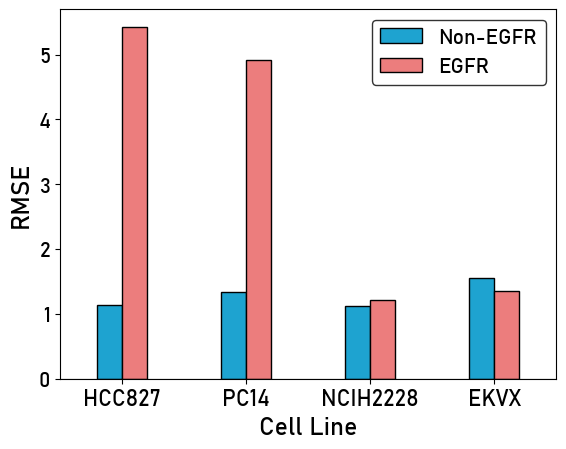

In [62]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# df_drug_sensitivity_rmse画柱状图，每个cell_line的result列的值，按照variable分成两个柱子，使用seaborn画图
palette = {
    'EGFR': '#FF6A6A',
    'Non-EGFR': '#00B2EE'
}
# 设置画布大小
# plt.figure(figsize=(6, 6))
# 画柱状图
sns.barplot(x='cell_line', y='result', hue='variable', data=df_drug_sensitivity_rmse, palette=palette,edgecolor='black',width=0.4)
# 设计legend样式
plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线
plt.axhline(0, color='black', linewidth=0.8)
# title
# plt.title('EGFR&Non-EGFR Drugs RMSE On LUAD (Cell-Blind)', fontsize=20)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=15)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
# 保存图片
plt.savefig('img/EGFR&Non-EGFR_Drugs_RMSE_On_LUAD_Cell_Blind.png', dpi=300, bbox_inches='tight')
plt.show()

In [54]:
# df_drug_sensitivity_non_EGFR中筛选出drug = [5-Fluorouracil,Bleomycin,Bortezomib,Camptothecin,Carmustine,Cisplatin,Cyclophosphamide,Cytarabine,Dactinomycin,Docetaxel,Epirubicin,Fludarabine,Gemcitabine,Irinotecan,Methotrexate,Mitoxantrone,Oxaliplatin,Paclitaxel,Podophyllotoxin bromide,SN-38,Staurosporine,Tamoxifen,Temozolomide,Teniposide,Topotecan,Vinblastine,Vincristine,Vinorelbine]的数据
chemotherapeutic_drugs = ['5-Fluorouracil','Bleomycin','Bortezomib','Camptothecin','Carmustine','Cisplatin','Cyclophosphamide','Cytarabine','Dactinomycin','Docetaxel','Epirubicin','Fludarabine','Gemcitabine','Irinotecan','Mitoxantrone','Oxaliplatin','Paclitaxel','Podophyllotoxin bromide','SN-38','Staurosporine','Tamoxifen','Temozolomide','Teniposide','Topotecan','Vinblastine','Vincristine','Vinorelbine']
# chemotherapeutic_drugs = ['Paclitaxel','Cisplatin']
df_drug_sensitivity_non_EGFR = df_drug_sensitivity_non_EGFR[df_drug_sensitivity_non_EGFR['drug'].isin(chemotherapeutic_drugs)]
print(df_drug_sensitivity_non_EGFR.shape)
df_drug_sensitivity_non_EGFR.head()

(105, 4)


,cell_line,drug,Ground Truth,Prediction
9492,HCC827,5-Fluorouracil,5.191741,5.472933
9529,HCC827,Bleomycin,2.310292,3.968763
9531,HCC827,Bortezomib,-4.751015,-4.627317
9538,HCC827,Camptothecin,-0.321596,-0.801389
9539,HCC827,Carmustine,7.419218,6.639975


In [59]:
# df_drug_sensitivity_non_EGFR,Melt the DataFrame with a different value_name,保留cell_line列
df_drug_sensitivity_non_EGFR = df_drug_sensitivity_non_EGFR.melt(id_vars=['cell_line', 'drug'], value_vars=['Ground Truth', 'Prediction'], var_name='variable', value_name='result')
# 根据cell_line和drug排序
# df_drug_sensitivity_non_EGFR = df_drug_sensitivity_non_EGFR.sort_values(by=['drug'])
print(df_drug_sensitivity_non_EGFR.shape)
df_drug_sensitivity_non_EGFR.head(110)


(1730, 4)


,cell_line,drug,variable,result
0,HCC827,5-Fluorouracil,Ground Truth,5.191741
1,HCC827,5-azacytidine,Ground Truth,3.595454
2,HCC827,A-366,Ground Truth,6.028838
3,HCC827,ABT737,Ground Truth,4.389625
4,HCC827,AGI-5198,Ground Truth,5.698307
...,...,...,...,...
105,HCC827,Lestaurtinib,Ground Truth,0.150939
106,HCC827,Linsitinib,Ground Truth,5.207676
107,HCC827,Luminespib,Ground Truth,-1.178819
108,HCC827,MG-132,Ground Truth,-1.488899


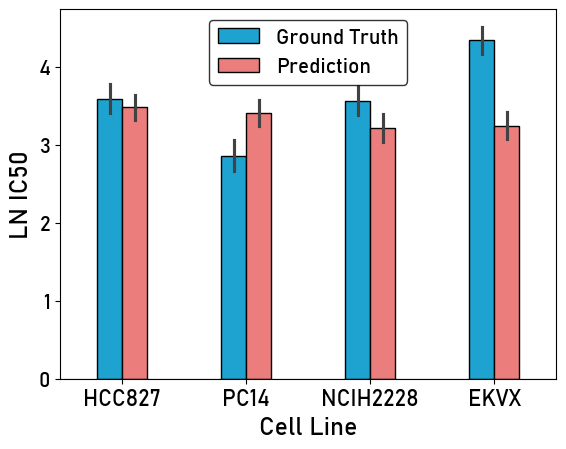

In [63]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# df_mix_set_drugs_mean画柱状图，每个cell_line的result列的值，按照variable分成两个柱子，使用seaborn画图
# 设置画布大小
palette = {
    'Ground Truth': '#00B2EE',
    'Prediction': '#FF6A6A'
}
# plt.figure(figsize=(6, 6))
# 画柱状图
sns.barplot(x='cell_line', y='result', hue='variable', data=df_drug_sensitivity_non_EGFR, palette=palette,edgecolor='black',width=0.4, errorbar='se')
# , errorbar='se'
# 'ci', 'pi', 'se', 'sd'
# 设计legend样式
plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线
plt.axhline(0, color='black', linewidth=0.8)
# title
# plt.title('Erlotinib IC50&Prediction On HCC827&PC14 (MixedSet)', fontsize=20)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=15)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('LN IC50', fontsize=18)
# 保存图片
plt.savefig('img/Non-EGFR_Drugs_IC50&Prediction_On_LUAD_CellBlind.png', dpi=300, bbox_inches='tight')
plt.show()

# 把图画的圆润一点

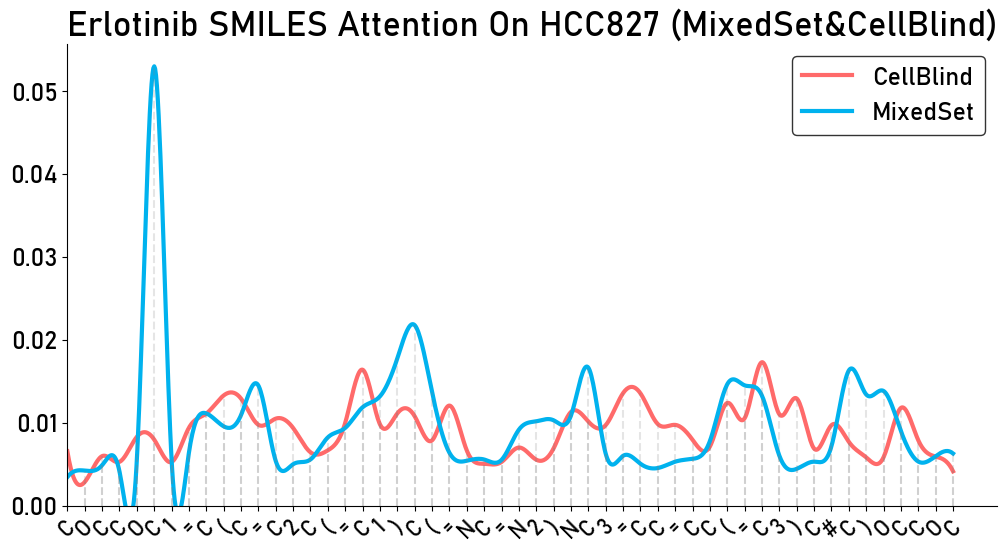

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# 取df_Erlotinib_HCC827_Mixed_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_HCC827_Mixed_CellBlind.iloc[1, :].values
HCC827_Mixed = df_Erlotinib_HCC827_Mixed_CellBlind.iloc[2, :].values.astype(float)
HCC827_CellBlind = df_Erlotinib_HCC827_Mixed_CellBlind.iloc[3, :].values.astype(float)

plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))

# 使用插值函数平滑曲线
x_old = np.arange(len(HCC827_CellBlind))
x_new = np.linspace(0, len(HCC827_CellBlind)-1, 1000)
y_CellBlind = interpolate.make_interp_spline(x_old, HCC827_CellBlind)(x_new)
y_Mixed = interpolate.make_interp_spline(x_old, HCC827_Mixed)(x_new)

plt.plot(x_new, y_CellBlind, label='CellBlind', linewidth=3, color='#FF6A6A')
plt.plot(x_new, y_Mixed, label='MixedSet', linewidth=3, color='#00B2EE')

# 每个点与X轴加上虚线
for i in range(len(HCC827_CellBlind)):
    plt.vlines(i, 0, HCC827_CellBlind[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(HCC827_Mixed)):
    plt.vlines(i, 0, HCC827_Mixed[i], linestyles='dashed', colors='grey', alpha=0.2)

# 显示label
plt.legend(fontsize=18, edgecolor='black', loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On HCC827 (MixedSet&CellBlind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(x_old, Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

# plt.savefig(drug_name + '_SMILES_Attention_Observation_HCC827_Mixed&CellBlind.png', dpi=300, bbox_inches='tight')
plt.show()

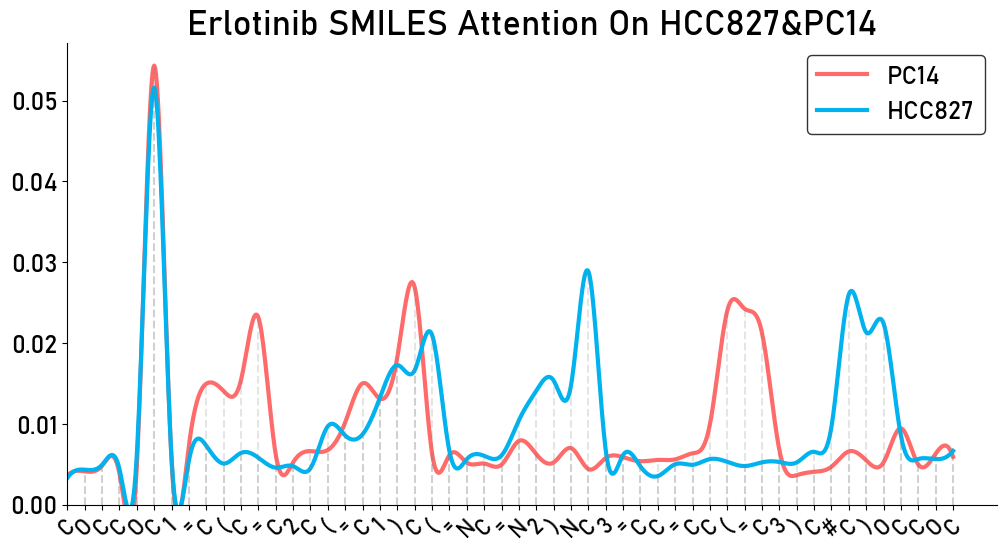

In [78]:
# 取df_Erlotinib_MixedSet_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_HCC827_PC14.iloc[1, :].values
HCC827_att = df_Erlotinib_HCC827_PC14.iloc[2, :].values.astype(float)
PC14_att = df_Erlotinib_HCC827_PC14.iloc[3, :].values.astype(float)
palette = {
    'Ground Truth': '#00B2EE',
    'Prediction': '#FF6A6A'
}

plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
# 使用插值函数平滑曲线
x_old = np.arange(len(HCC827_att))
x_new = np.linspace(0, len(HCC827_att)-1, 1000)
y_HCC827_att = interpolate.make_interp_spline(x_old, HCC827_att)(x_new)
y_PC14_att = interpolate.make_interp_spline(x_old, PC14_att)(x_new)

plt.plot(x_new, y_PC14_att, label='PC14',linewidth=3, color='#FF6A6A')
plt.plot(x_new, y_HCC827_att, label='HCC827',linewidth=3, color='#00B2EE')
# 每个点与X轴加上虚线
for i in range(len(HCC827_att)):
    plt.vlines(i, 0, HCC827_att[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(PC14_att)):
    plt.vlines(i, 0, PC14_att[i], linestyles='dashed', colors='grey', alpha=0.2)
# 显示label
plt.legend(fontsize=18,edgecolor='black',loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On HCC827&PC14', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

plt.savefig(drug_name + '_SMILES_Attention_Observation_HCC827&PC14.png', dpi=300, bbox_inches='tight')
plt.show()

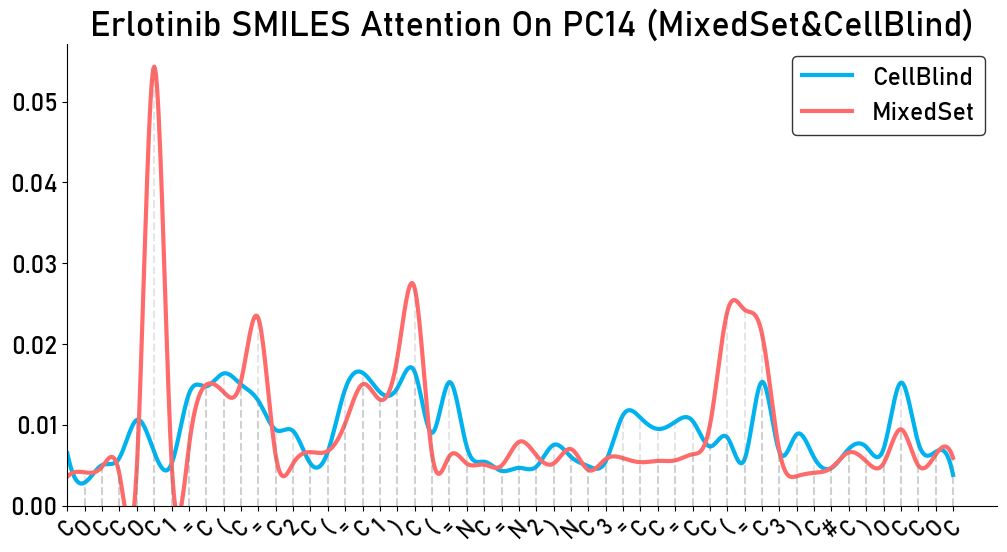

In [79]:
# 取df_Erlotinib_PC14_Mixed_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_PC14_Mixed_CellBlind.iloc[1, :].values
PC14_Mixed = df_Erlotinib_PC14_Mixed_CellBlind.iloc[2, :].values.astype(float)
PC14_CellBlind = df_Erlotinib_PC14_Mixed_CellBlind.iloc[3, :].values.astype(float)
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))

# 使用插值函数平滑曲线
x_old = np.arange(len(PC14_CellBlind))
x_new = np.linspace(0, len(PC14_CellBlind)-1, 1000)
y_PC14_CellBlind = interpolate.make_interp_spline(x_old, PC14_CellBlind)(x_new)
y_PC14_Mixed = interpolate.make_interp_spline(x_old, PC14_Mixed)(x_new)

plt.plot(x_new, y_PC14_CellBlind, label='CellBlind',linewidth=3, color='#00B2EE')
plt.plot(x_new, y_PC14_Mixed, label='MixedSet',linewidth=3, color='#FF6A6A')
# 每个点与X轴加上虚线
for i in range(len(PC14_CellBlind)):
    plt.vlines(i, 0, PC14_CellBlind[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(PC14_Mixed)):
    plt.vlines(i, 0, PC14_Mixed[i], linestyles='dashed', colors='grey', alpha=0.2)
# 显示label
plt.legend(fontsize=18,edgecolor='black',loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On PC14 (MixedSet&CellBlind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

plt.savefig(drug_name + '_SMILES_Attention_Observation_PC-14_Mixed&CellBlind.png', dpi=300, bbox_inches='tight')
plt.show()